In [2]:
import numpy as np
from utils import normalize_rdm

# load the RDMs
RDM_rgb = np.load('./data/rdms/RDM_rgb.npy')
RDM_flow = np.load('./data/rdms/RDM_flow.npy')

layers = ['Conv3d_1a_7x7', 'Mixed_4c', 'Mixed_5c']

for layer in range(len(layers)):
    RDM_rgb[layer, :, :] = normalize_rdm(RDM_rgb[layer, :, :])
    RDM_flow[layer, :, :] = normalize_rdm(RDM_flow[layer, :, :])

#### Visualize RDMs

Text(0.5, 1.0, 'Mixed_5c')

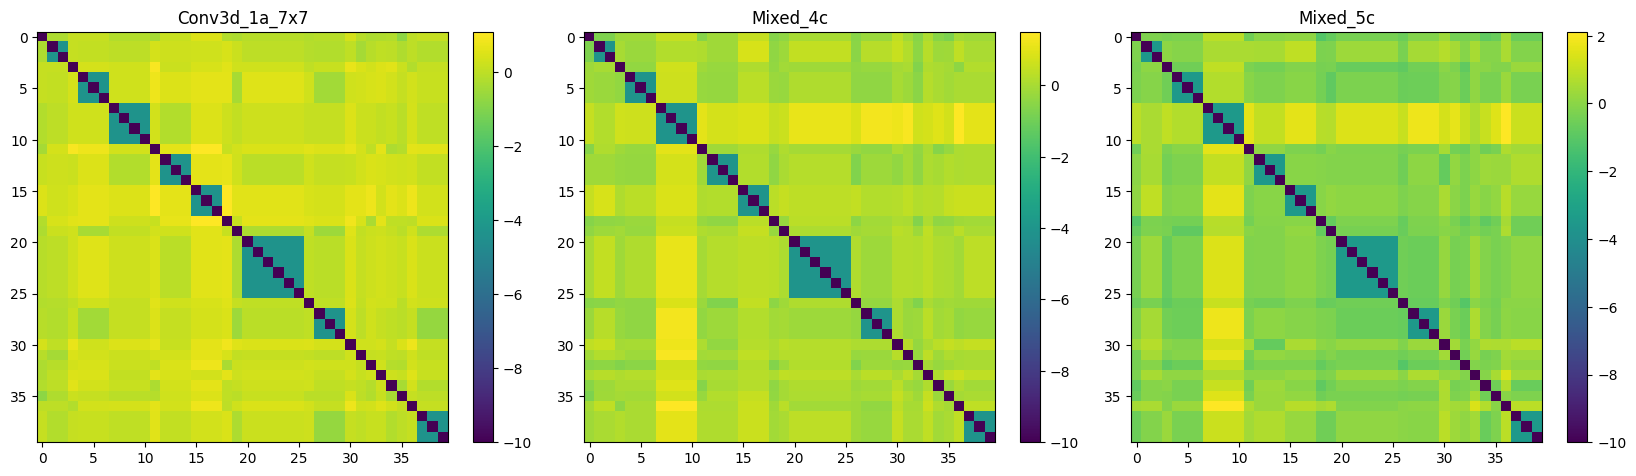

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

layers = ['Conv3d_1a_7x7', 'Mixed_4c', 'Mixed_5c']

fig, axs = plt.subplots(1, 3, figsize=(20, 30))

for layer in layers:
    fig1 = axs[layers.index(layer)].imshow(RDM_rgb[layers.index(layer), :, :])
    divider = make_axes_locatable(axs[layers.index(layer)])
    cax = divider.append_axes('right', size='5%', pad=0.25)
    c1 = plt.colorbar(fig1, ax=axs[layers.index(layer)], cax=cax)


axs[0].set_title(layers[0])
axs[1].set_title(layers[1])
axs[2].set_title(layers[2])

# # save the figure
# plt.savefig('rgb_RDMs')

Text(0.5, 1.0, 'Mixed_5c')

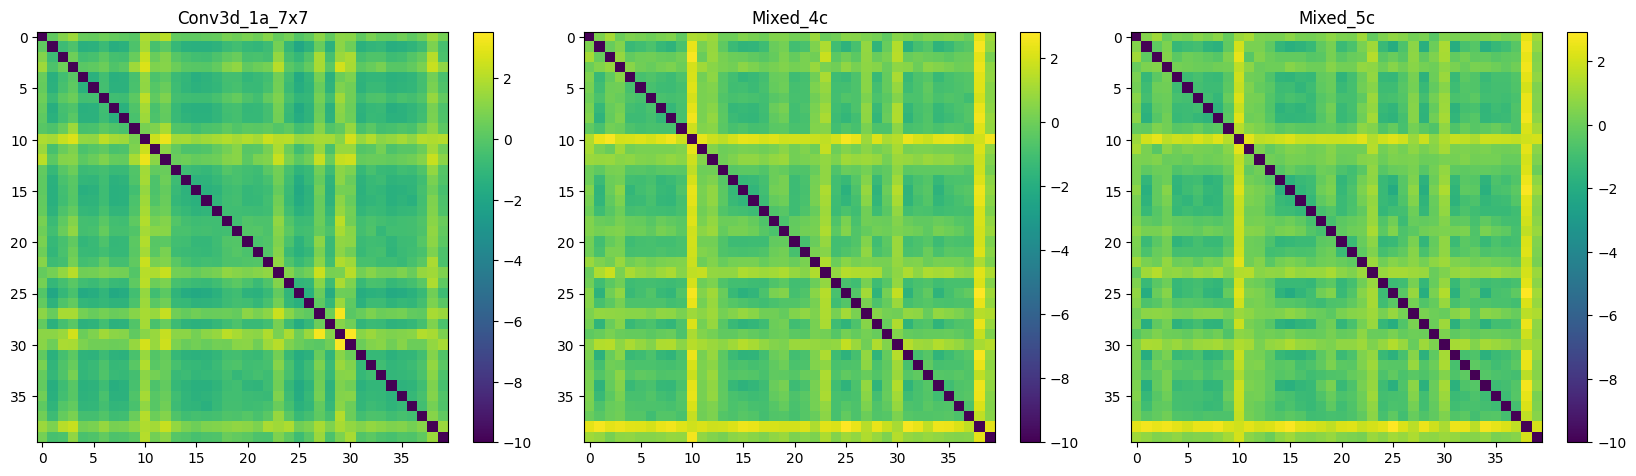

In [5]:
layers = ['Conv3d_1a_7x7', 'Mixed_4c', 'Mixed_5c']

fig, axs = plt.subplots(1, 3, figsize=(20, 30))

for layer in layers:
    fig1 = axs[layers.index(layer)].imshow(RDM_flow[layers.index(layer), :, :])
    divider = make_axes_locatable(axs[layers.index(layer)])
    cax = divider.append_axes('right', size='5%', pad=0.25)
    c1 = plt.colorbar(fig1, ax=axs[layers.index(layer)], cax=cax)


axs[0].set_title(layers[0])
axs[1].set_title(layers[1])
axs[2].set_title(layers[2])

#### Multidimensional Scaling (MDS)

In [52]:
import numpy as np
from sklearn.manifold import MDS
import scipy.stats as stats

layers = ['Conv3d_1a_7x7', 'Mixed_4c', 'Mixed_5c']

# initializa MDS
MDS_rgb = np.zeros((3,40,2))
MDS_flow = np.zeros((3,40,2))


embedding = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto')

# create MDS
for layer in layers:

    MDS_rgb[layers.index(layer), :, :] = embedding.fit_transform(RDM_rgb[layers.index(layer), :, :])
    MDS_flow[layers.index(layer), :, :] = embedding.fit_transform(RDM_flow[layers.index(layer), :, :])


Text(0, 0.5, 'Mixed-5c')

<Figure size 640x480 with 0 Axes>

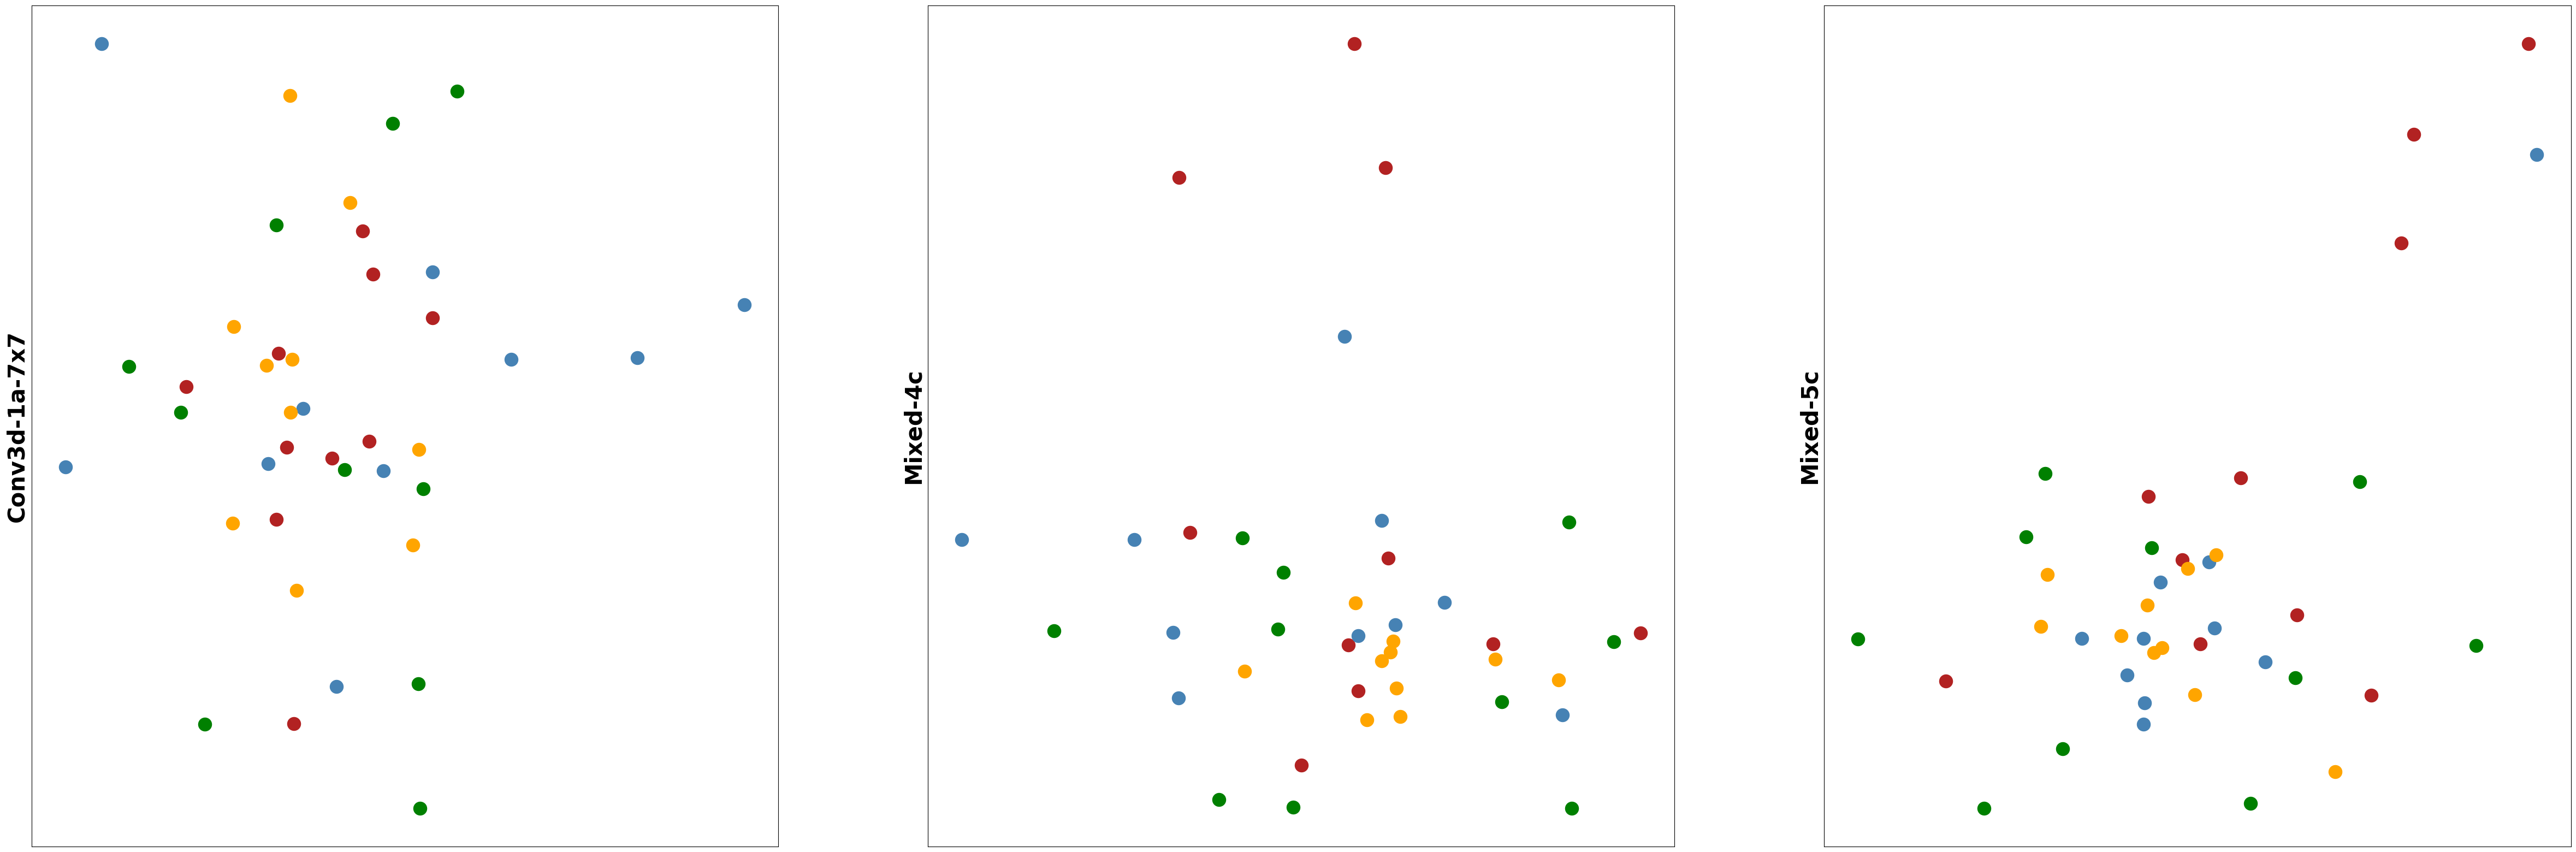

In [53]:
import matplotlib.pyplot as plt

layers = ['Conv3d_1a_7x7', 'Mixed_4c', 'Mixed_5c']

fig = plt.figure();
fig, axes = plt.subplots(1, 3, figsize=(60, 20));

for layer in layers:

    # face
    axes[layers.index(layer)].scatter(MDS_rgb[layers.index(layer),:10,0], MDS_rgb[layers.index(layer),:10,1], color='firebrick', s=300, label='face')
    # body part
    axes[layers.index(layer)].scatter(MDS_rgb[layers.index(layer),10:20,0], MDS_rgb[layers.index(layer),10:20,1], color='steelblue', s=300, label='body part')
    # animal
    axes[layers.index(layer)].scatter(MDS_rgb[layers.index(layer),20:30,0], MDS_rgb[layers.index(layer),20:30,1], color='green', s=300, label='animal')
    # non-animal
    axes[layers.index(layer)].scatter(MDS_rgb[layers.index(layer),30:,0], MDS_rgb[layers.index(layer),30:,1], color='orange', s=300, label='non-animal')

    axes[layers.index(layer)].set_xticks([])
    axes[layers.index(layer)].set_yticks([])


axes[0].set_ylabel('Conv3d-1a-7x7', fontdict=dict(weight='bold', size=30))  # early layer
axes[1].set_ylabel('Mixed-4c', fontdict=dict(weight='bold', size=30))  # mid layer
axes[2].set_ylabel('Mixed-5c', fontdict=dict(weight='bold', size=30)) # last layer

# # save the figure
# plt.savefig('rgb_MDS');

Text(0, 0.5, 'Mixed-5c')

<Figure size 640x480 with 0 Axes>

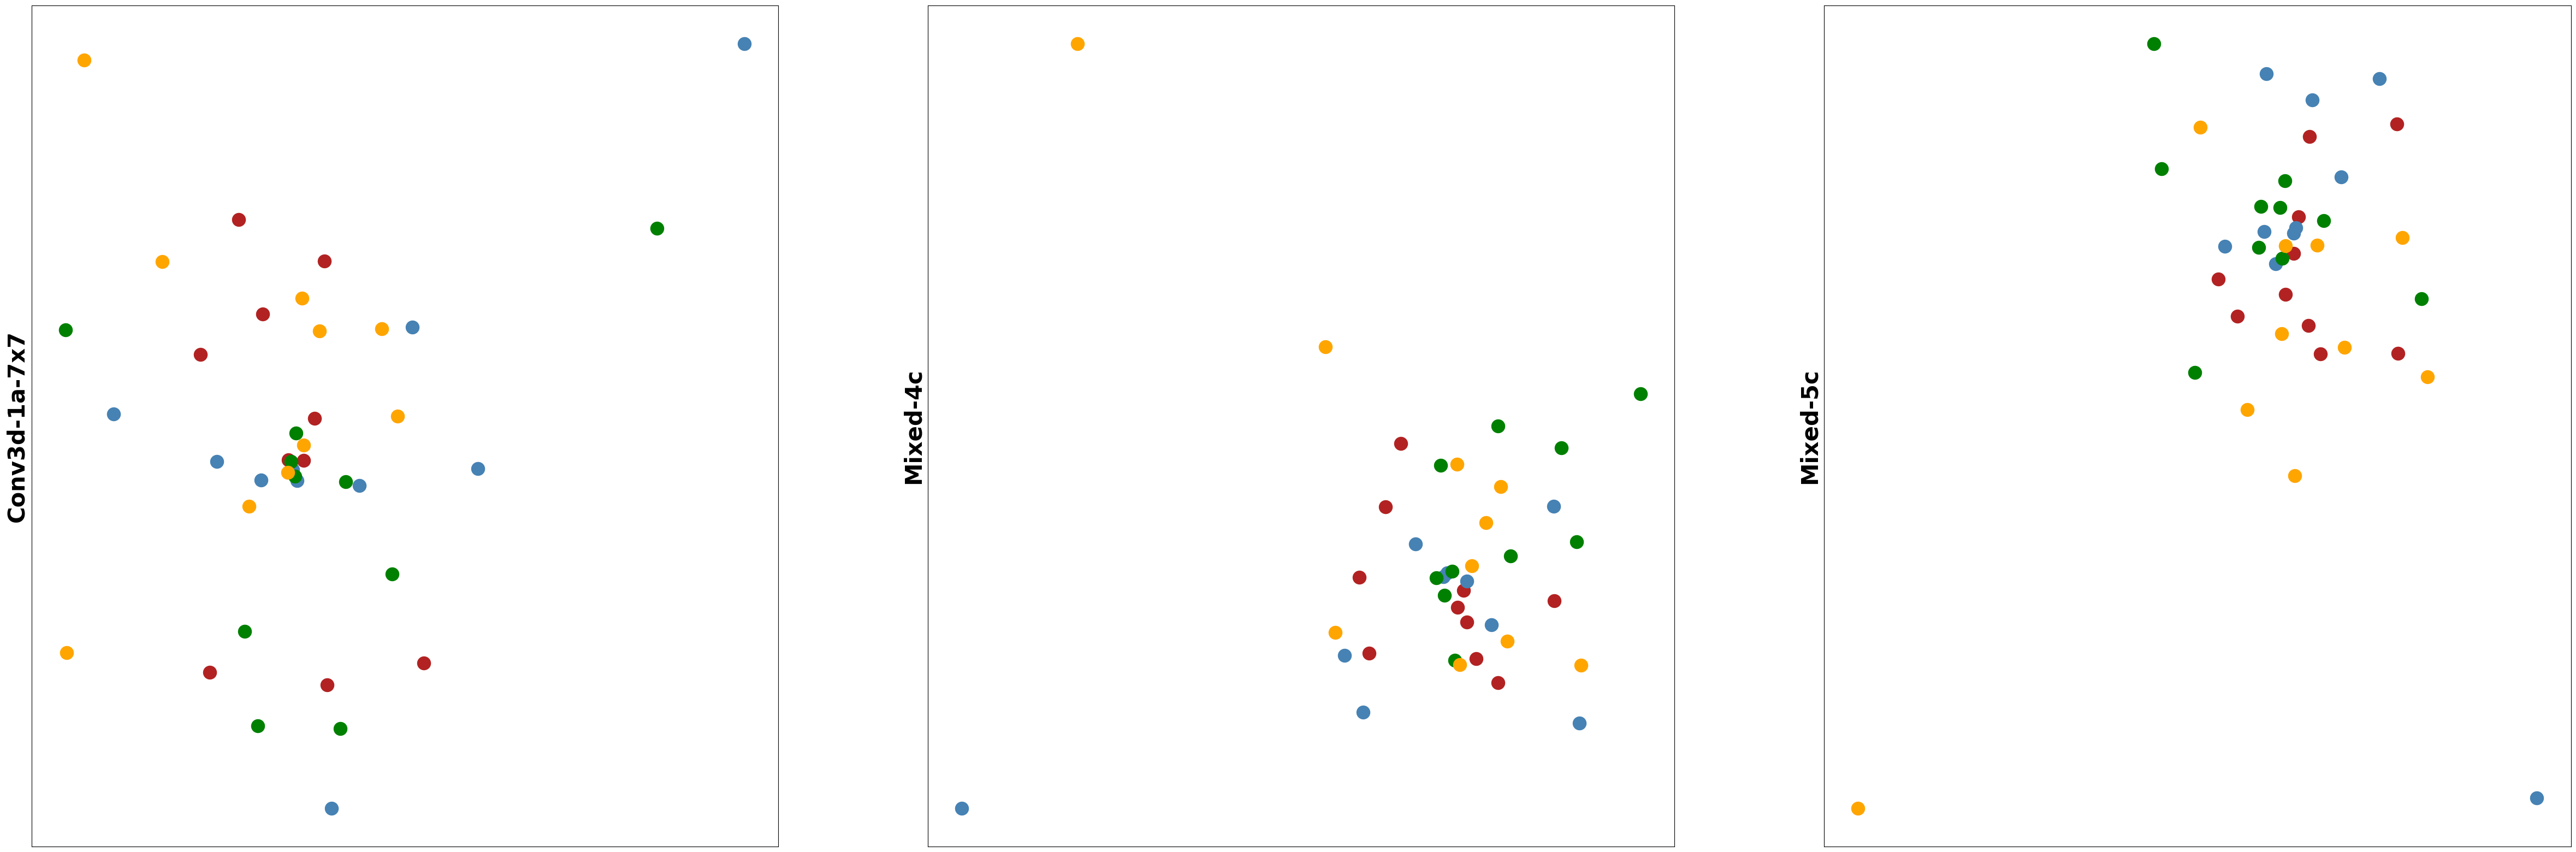

In [12]:
import matplotlib.pyplot as plt

layers = ['Conv3d_1a_7x7', 'Mixed_4c', 'Mixed_5c']

fig = plt.figure();
fig, axes = plt.subplots(1, 3, figsize=(60, 20));

for layer in layers:

    # face
    axes[layers.index(layer)].scatter(MDS_flow[layers.index(layer),:10,0], MDS_flow[layers.index(layer),:10,1], color='firebrick', s=300, label='face')
    # body part
    axes[layers.index(layer)].scatter(MDS_flow[layers.index(layer),10:20,0], MDS_flow[layers.index(layer),10:20,1], color='steelblue', s=300, label='body part')
    # animal
    axes[layers.index(layer)].scatter(MDS_flow[layers.index(layer),20:30,0], MDS_flow[layers.index(layer),20:30,1], color='green', s=300, label='animal')
    # non-animal
    axes[layers.index(layer)].scatter(MDS_flow[layers.index(layer),30:,0], MDS_flow[layers.index(layer),30:,1], color='orange', s=300, label='non-animal')

    axes[layers.index(layer)].set_xticks([])
    axes[layers.index(layer)].set_yticks([])


axes[0].set_ylabel('Conv3d-1a-7x7', fontdict=dict(weight='bold', size=30))  # early layer
axes[1].set_ylabel('Mixed-4c', fontdict=dict(weight='bold', size=30))  # mid layer
axes[2].set_ylabel('Mixed-5c', fontdict=dict(weight='bold', size=30)) # last layer

# # save the figure
# plt.savefig('flow_MDS');

#### tSNE

In [18]:
import numpy as np
from sklearn.manifold import TSNE
import scipy.stats as stats

layers = ['Conv3d_1a_7x7', 'Mixed_4c', 'Mixed_5c']

# initializa MDS
TSNE_rgb = np.zeros((3,40,2))
TSNE_flow = np.zeros((3,40,2))


embedding = TSNE(n_components=2, random_state=42)

# create MDS
for layer in layers:

    TSNE_rgb[layers.index(layer), :, :] = embedding.fit_transform(RDM_rgb[layers.index(layer), :, :])
    TSNE_flow[layers.index(layer), :, :] = embedding.fit_transform(RDM_flow[layers.index(layer), :, :])


embedding.kl_divergence_

0.0210643969476223